In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import geopandas as gpd
sys.path.append("../../../")
%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv("../dataset/pm.csv")

In [5]:
df.head()

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/11/1990,AQS,120111003,1,45,ug/m3 SC,42,NaN,1,100.0,81102,PM10 Total 0-10um STP,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.129531,-80.168379
1,01/17/1990,AQS,120111003,1,21,ug/m3 SC,19,NaN,1,100.0,81102,PM10 Total 0-10um STP,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.129531,-80.168379
2,01/23/1990,AQS,120111003,1,26,ug/m3 SC,24,NaN,1,100.0,81102,PM10 Total 0-10um STP,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.129531,-80.168379
3,01/29/1990,AQS,120111003,1,26,ug/m3 SC,24,NaN,1,100.0,81102,PM10 Total 0-10um STP,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.129531,-80.168379
4,02/04/1990,AQS,120111003,1,19,ug/m3 SC,18,NaN,1,100.0,81102,PM10 Total 0-10um STP,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.129531,-80.168379


In [6]:
centroids = np.load("USA_Centroids.npy")

In [7]:
tdf = df.drop(columns=[ 'Source', 
       'UNITS', 'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT',
        'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC',
        'CBSA_CODE','CBSA_NAME', 'POC'
                ])

In [8]:
tdf.head()

,Date,Site ID,Daily Mean PM10 Concentration,PERCENT_COMPLETE,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/11/1990,120111003,45,100.0,12,Florida,11,Broward,26.129531,-80.168379
1,01/17/1990,120111003,21,100.0,12,Florida,11,Broward,26.129531,-80.168379
2,01/23/1990,120111003,26,100.0,12,Florida,11,Broward,26.129531,-80.168379
3,01/29/1990,120111003,26,100.0,12,Florida,11,Broward,26.129531,-80.168379
4,02/04/1990,120111003,19,100.0,12,Florida,11,Broward,26.129531,-80.168379


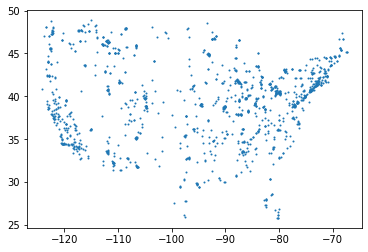

In [9]:
tdf = tdf[tdf['STATE']!='Hawaii']
tdf = tdf[tdf['STATE']!='Alaska']

plt.scatter(tdf['SITE_LONGITUDE'].unique(), tdf['SITE_LATITUDE'].unique(), s = 1)
plt.show()

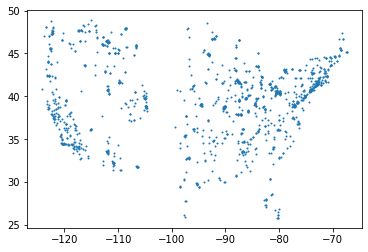

In [10]:
t1 = pd.concat([tdf[tdf['SITE_LONGITUDE']<-104.01], tdf[tdf['SITE_LONGITUDE']>-99.42]])
t1 = t1[t1['STATE']!='New Mexico']
# t1 = t1[t1['STATE']!='Arizona']
plt.scatter(t1['SITE_LONGITUDE'].unique(), t1['SITE_LATITUDE'].unique(), s = 1)
plt.show()

In [11]:
t2 = t1.copy()

In [12]:
states = t1['STATE'].unique()
nw = ['Washington', 'Oregon', 'Wyoming','Idaho', 'Montana', 'Colorado','Utah','Nevada']
sc = ['California']
mw = ['West Virginia', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
se = ['Oklahoma','Florida', 'Alabama', 'Georgia',  'Tennessee', 'South Carolina', 'North Carolina', 'Virginia', 'Louisiana', 'Arkansas', 'Texas', 'Kentucky']
ne = ['Connecticut',
 'Delaware',
 'Maine',
 'Maryland',
 'Massachusetts',
 'New Hampshire',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Rhode Island',
 'Vermont','District Of Columbia'
]


In [13]:
nwdf = t1[np.isin(t1['STATE'], nw)]
mwdf = t1[np.isin(t1['STATE'], mw)]
sedf = t1[np.isin(t1['STATE'], se)]
nedf = t1[np.isin(t1['STATE'], ne)]
cal = t1[np.isin(t1['STATE'], ['California'])]
ncal = cal[cal['SITE_LATITUDE']>=34.81]
scal = cal[cal['SITE_LATITUDE']<34.81]
# nwdf = pd.concat([nwdf, t1[t1[np.isin(t1['STATE'], ['California'])]]['SITE_LATITUDE']>34.81])

nwdf = pd.concat([nwdf, ncal])

## DATA VALIDATION



In [14]:
def func_select_11(df):
    t = df.groupby(['Date', 'Site ID', 'STATE', 'COUNTY_CODE','COUNTY']).mean()
    t = t.reset_index(None)
    t1 = t.groupby('Site ID').count()
    t11 = t.set_index(['Site ID'])
    t11 = t11[t1['Date']>11]
    t11 = t11.reset_index(None)
    return t11

In [15]:
mwq1 = mwdf[mwdf['Date']<='03/31/1990']
mwq2 = mwdf[(mwdf['Date']>='04/01/1990').values & (mwdf['Date']<='06/30/1990').values]
mwq3 = mwdf[(mwdf['Date']>='07/01/1990').values & (mwdf['Date']<='09/30/1990').values]
mwq4 = mwdf[(mwdf['Date']>='10/01/1990').values & (mwdf['Date']<='12/31/1990').values]

In [16]:
mwdf.groupby('Site ID').mean()

,Daily Mean PM10 Concentration,PERCENT_COMPLETE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
Site ID,,,,,,
170010006,26.850000,100.0,17.0,1.0,39.933010,-91.404237
170190005,28.381818,100.0,17.0,19.0,40.121976,-88.243383
170290001,23.943396,100.0,17.0,29.0,39.490591,-88.162262
170310014,39.017544,100.0,17.0,31.0,41.834276,-87.623851
170310022,37.412308,100.0,17.0,31.0,41.687165,-87.539315
...,...,...,...,...,...,...
550790064,34.054545,100.0,55.0,79.0,43.016958,-87.918141
551230008,18.622951,100.0,55.0,123.0,43.702220,-90.568300
551310008,21.206897,100.0,55.0,131.0,43.318058,-88.321763


## Annual Interpolations First

## Kriging, done per region; others using the earlier setting.

In [17]:
t1 = t1.groupby('Site ID').mean()
t1 = t1.reset_index()

In [18]:
X = t1[['SITE_LONGITUDE', 'SITE_LATITUDE']].values
y = t1[['Daily Mean PM10 Concentration']].values

In [19]:
t1.describe()

,Site ID,Daily Mean PM10 Concentration,PERCENT_COMPLETE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,1.274000e+03,1274.000000,1274.0,1274.000000,1274.000000,1274.000000,1274.000000
mean,2.656871e+08,28.943658,100.0,26.490581,78.054160,39.630435,-93.767838
std,1.580209e+08,11.524225,0.0,15.781013,103.015345,4.581312,16.893547
min,1.015000e+07,3.333333,100.0,1.000000,1.000000,25.794222,-124.162100
25%,1.000323e+08,22.391667,100.0,10.000000,19.500000,36.558985,-110.833607
50%,2.703702e+08,27.299806,100.0,27.000000,55.000000,40.069049,-88.133548
75%,3.914200e+08,33.634208,100.0,39.000000,98.500000,42.638166,-79.992582
max,5.603900e+08,144.666667,100.0,56.000000,840.000000,48.879323,-67.396792


### Spatial Interpolation

In [20]:
from polire.interpolate import SpatialAverage
spatial = SpatialAverage(coordinate_type='Geographic', radius=16.1)
spatial.fit(X, y)

SpatialAverage

In [22]:
spatial_predictions = np.zeros(centroids.shape[0])

for ix in np.arange(0, centroids.shape[0], 1000):
    
    if centroids.shape[0] - ix >= 1000: 
        spatial_predictions[ix: ix + 1000] = spatial.predict(centroids[ix:ix + 1000]).squeeze()
    
    else: 
        spatial_predictions[ix: ] = spatial.predict(centroids[ix:])

In [23]:
spatial_predictions = spatial_predictions[~np.isnan(spatial_predictions)]

In [24]:
def summary_stats(x):
    print("Mean", x.mean())
    print("25 Percentile", np.percentile(x, 25))
    print("50th %ile/ Median", np.percentile(x, 50))
    print("75th %ile", np.percentile(x, 75))

In [25]:
summary_stats(spatial_predictions)

Mean 31.944817115560397
25 Percentile 25.83343074225599
50th %ile/ Median 30.178879310344826
75th %ile 34.73306451612903


### IDW

In [26]:
from polire.interpolate import Idw
from polire.utils.distance import haversine, euclidean
idw = Idw(coordinate_type='Geographic')
idw.fit(X, y)

idw_predictions = np.zeros(centroids.shape[0])
for ix, data_point in enumerate(centroids):
    distances = haversine(data_point, X)
    mask = distances <= 250
    X_train = X[mask]
    y_train = y[mask]
    idw_predictions[ix] = idw.predict(data_point.reshape(1, 2))

# $k$-NN


In [27]:
from polire.custom import CustomInterpolator
from sklearn.neighbors import KNeighborsRegressor
knn = CustomInterpolator(KNeighborsRegressor, reg_kwargs={'n_neighbors':1})
knn.fit(X, y)
knn_predictions = knn.predict(centroids)

In [28]:
print("KNN")
summary_stats(knn_predictions)

KNN
Mean 30.33785471228087
25 Percentile 24.50877192982456
50th %ile/ Median 28.274509803921568
75th %ile 34.074074074074076


In [29]:
print("Spatial Averaging")
summary_stats(spatial_predictions)

Spatial Averaging
Mean 31.944817115560397
25 Percentile 25.83343074225599
50th %ile/ Median 30.178879310344826
75th %ile 34.73306451612903


In [30]:
print("IDW")
summary_stats(idw_predictions)

IDW
Mean 30.818663163101153
25 Percentile 26.915438909016355
50th %ile/ Median 29.427777862088966
75th %ile 32.4221701027831


## PER QUARTER AND KRIGING LEFT

## Per Quarter

# Q1

In [31]:
t2.head()

,Date,Site ID,Daily Mean PM10 Concentration,PERCENT_COMPLETE,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
16325,01/05/1990,560010006,34,100.0,56,Wyoming,1,Albany,41.311586,-105.591725
16326,01/11/1990,560010006,18,100.0,56,Wyoming,1,Albany,41.311586,-105.591725
16327,01/23/1990,560010006,14,100.0,56,Wyoming,1,Albany,41.311586,-105.591725
16328,02/10/1990,560010006,12,100.0,56,Wyoming,1,Albany,41.311586,-105.591725
16329,02/28/1990,560010006,39,100.0,56,Wyoming,1,Albany,41.311586,-105.591725


In [32]:
q1 = t2[t2['Date']<='03/31/1990']
q1 = func_select_11(q1)
q1.drop(columns=['STATE', 'COUNTY_CODE', 'COUNTY', 'PERCENT_COMPLETE'], inplace=True)
q1 = q1.groupby('Site ID').mean()
X = q1[['SITE_LONGITUDE', 'SITE_LATITUDE']].values
y = q1[['Daily Mean PM10 Concentration']].values

## Spatial Averaging

In [33]:
from polire.interpolate import SpatialAverage
spatial = SpatialAverage(coordinate_type='Geographic', radius=16.1)
spatial.fit(X, y)

SpatialAverage

In [35]:
spatial_predictions = np.zeros(centroids.shape[0])

for ix in np.arange(0, centroids.shape[0], 1000):
    
    if centroids.shape[0] - ix >= 1000: 
        spatial_predictions[ix: ix + 1000] = spatial.predict(centroids[ix:ix + 1000]).squeeze()
    
    else: 
        spatial_predictions[ix: ] = spatial.predict(centroids[ix:])

## IDW

In [36]:
from polire.interpolate import Idw
from polire.utils.distance import haversine, euclidean
idw = Idw(coordinate_type='Geographic')
idw.fit(X, y)
idw_predictions = np.zeros(centroids.shape[0])
for ix, data_point in enumerate(centroids):
    distances = haversine(data_point, X)
    mask = distances <= 250
    X_train = X[mask]
    y_train = y[mask]
    idw_predictions[ix] = idw.predict(data_point.reshape(1, 2))

### $k$-NN, with $k = 1$.

In [37]:
from polire.custom import CustomInterpolator
from sklearn.neighbors import KNeighborsRegressor
knn = CustomInterpolator(KNeighborsRegressor, reg_kwargs={'n_neighbors':1})
knn.fit(X, y)
knn_predictions = knn.predict(centroids)

## Summary Statistics

### Station

In [38]:
## Station Mean
print("Station Statistics")
print("------------------")
print("Mean", y.mean())
## Station 25 Percentile
print("25 Percentile", np.percentile(y, 25))
## Station 50 Percentile / Median
print("50 Percentile / Median", np.percentile(y, 50))
## Station 75 Percentile
print("75 Percentile", np.percentile(y, 75))

Station Statistics
------------------
Mean 27.44022541440442
25 Percentile 20.066666666666666
50 Percentile / Median 25.378571428571426
75 Percentile 32.62307692307692


### IDW

In [39]:
## IDW Mean
print("IDW Statistics")
print("------------------")
print("Mean", idw_predictions.mean())
##  25 Percentile
print("25 Percentile", np.percentile(idw_predictions, 25))
##  50 Percentile / Median
print("50 Percentile / Median", np.percentile(idw_predictions, 50))
##  75 Percentile
print("75 Percentile", np.percentile(idw_predictions, 75))

IDW Statistics
------------------
Mean 28.824311275689336
25 Percentile 24.22179184337761
50 Percentile / Median 26.786882517580704
75 Percentile 31.05568493632635


### Spatial Averaging

In [40]:
t_spatial_predictions = spatial_predictions[~np.isnan(spatial_predictions)]

In [41]:
## Spatial Averaging Mean
print("Spatial Averaging Statistics")
print("------------------")
print("Mean", t_spatial_predictions.mean())
##  25 Percentile
print("25 Percentile", np.percentile(t_spatial_predictions, 25))
##  50 Percentile / Median
print("50 Percentile / Median", np.percentile(t_spatial_predictions, 50))
##  75 Percentile
print("75 Percentile", np.percentile(t_spatial_predictions, 75))

Spatial Averaging Statistics
------------------
Mean 30.635009716010725
25 Percentile 23.746153846153845
50 Percentile / Median 28.936507936507937
75 Percentile 34.25


### $1$-NN

In [42]:
## KNN Mean
print("KNN Statistics")
print("------------------")
print("Mean", knn_predictions.mean())
##  25 Percentile
print("25 Percentile", np.percentile(knn_predictions, 25))
##  50 Percentile / Median
print("50 Percentile / Median", np.percentile(knn_predictions, 50))
##  75 Percentile
print("75 Percentile", np.percentile(knn_predictions, 75))

KNN Statistics
------------------
Mean 28.42169763755743
25 Percentile 21.333333333333332
50 Percentile / Median 26.066666666666666
75 Percentile 32.6


# Q2

In [43]:
q2 = t2[(t2['Date']>='04/01/1990').values & (t2['Date']<='06/30/1990').values]
q2 = func_select_11(q2)
q2.drop(columns=['STATE', 'COUNTY_CODE', 'COUNTY', 'PERCENT_COMPLETE'], inplace=True)
q2 = q2.groupby('Site ID').mean()
X = q2[['SITE_LONGITUDE', 'SITE_LATITUDE']].values
y = q2[['Daily Mean PM10 Concentration']].values

## Spatial

In [44]:
spatial = SpatialAverage(coordinate_type='Geographic', radius=16.1)
spatial.fit(X, y)

spatial_predictions = np.zeros(centroids.shape[0])

for ix in np.arange(0, centroids.shape[0], 1000):
    
    if centroids.shape[0] - ix >= 1000: 
        spatial_predictions[ix: ix + 1000] = spatial.predict(centroids[ix:ix + 1000]).squeeze()
    
    else: 
        spatial_predictions[ix: ] = spatial.predict(centroids[ix:])

## IDW

In [45]:
idw = Idw(coordinate_type='Geographic')
idw.fit(X, y)
idw_predictions = np.zeros(centroids.shape[0])
for ix, data_point in enumerate(centroids):
    distances = haversine(data_point, X)
    mask = distances <= 250
    X_train = X[mask]
    y_train = y[mask]
    idw_predictions[ix] = idw.predict(data_point.reshape(1, 2))

## 1NN

In [46]:
knn = CustomInterpolator(KNeighborsRegressor, reg_kwargs={'n_neighbors':1})
knn.fit(X, y)
knn_predictions = knn.predict(centroids)

In [47]:
## Station Mean
print("Station Statistics")
print("------------------")
print("Mean", y.mean())
## Station 25 Percentile
print("25 Percentile", np.percentile(y, 25))
## Station 50 Percentile / Median
print("50 Percentile / Median", np.percentile(y, 50))
## Station 75 Percentile
print("75 Percentile", np.percentile(y, 75))

## IDW Mean
print("IDW Statistics")
print("------------------")
print("Mean", idw_predictions.mean())
##  25 Percentile
print("25 Percentile", np.percentile(idw_predictions, 25))
##  50 Percentile / Median
print("50 Percentile / Median", np.percentile(idw_predictions, 50))
##  75 Percentile
print("75 Percentile", np.percentile(idw_predictions, 75))


## Spatial Averaging Mean

t_spatial_predictions = spatial_predictions[~np.isnan(spatial_predictions)]
print("Spatial Averaging Statistics")
print("------------------")
print("Mean", t_spatial_predictions.mean())
##  25 Percentile
print("25 Percentile", np.percentile(t_spatial_predictions, 25))
##  50 Percentile / Median
print("50 Percentile / Median", np.percentile(t_spatial_predictions, 50))
##  75 Percentile
print("75 Percentile", np.percentile(t_spatial_predictions, 75))

## KNN Mean
print("KNN Statistics")
print("------------------")
print("Mean", knn_predictions.mean())
##  25 Percentile
print("25 Percentile", np.percentile(knn_predictions, 25))
##  50 Percentile / Median
print("50 Percentile / Median", np.percentile(knn_predictions, 50))
##  75 Percentile
print("75 Percentile", np.percentile(knn_predictions, 75))

Station Statistics
------------------
Mean 26.00743198767704
25 Percentile 20.0
50 Percentile / Median 24.723809523809525
75 Percentile 30.533333333333335
IDW Statistics
------------------
Mean 27.89066069471965
25 Percentile 24.26321288511181
50 Percentile / Median 27.183514183556433
75 Percentile 30.049815210488255
Spatial Averaging Statistics
------------------
Mean 28.519378571579164
25 Percentile 23.03333333333333
50 Percentile / Median 27.266666666666666
75 Percentile 32.925428194993415
KNN Statistics
------------------
Mean 27.273765835308186
25 Percentile 21.733333333333334
50 Percentile / Median 25.8
75 Percentile 30.454545454545453


# Q3

In [ ]:
q3 = t2[(t2['Date']>='07/01/1990').values & (t2['Date']<='09/30/1990').values]
q3 = func_select_11(q3)
q3.drop(columns=['STATE', 'COUNTY_CODE', 'COUNTY', 'PERCENT_COMPLETE'], inplace=True)
q3 = q3.groupby('Site ID').mean()
X = q3[['SITE_LONGITUDE', 'SITE_LATITUDE']].values
y = q3[['Daily Mean PM10 Concentration']].values


spatial = SpatialAverage(coordinate_type='Geographic', radius=16.1)
spatial.fit(X, y)

spatial_predictions = np.zeros(centroids.shape[0])

for ix in np.arange(0, centroids.shape[0], 1000):
    
    if centroids.shape[0] - ix >= 1000: 
        spatial_predictions[ix: ix + 1000] = spatial.predict(centroids[ix:ix + 1000]).squeeze()
    
    else: 
        spatial_predictions[ix: ] = spatial.predict(centroids[ix:])
        
idw = Idw(coordinate_type='Geographic')
idw.fit(X, y)
idw_predictions = np.zeros(centroids.shape[0])
for ix, data_point in enumerate(centroids):
    distances = haversine(data_point, X)
    mask = distances <= 250
    X_train = X[mask]
    y_train = y[mask]
    idw_predictions[ix] = idw.predict(data_point.reshape(1, 2))       

knn = CustomInterpolator(KNeighborsRegressor, reg_kwargs={'n_neighbors':1})
knn.fit(X, y)
knn_predictions = knn.predict(centroids)

In [ ]:
## Station Mean
print("Station Statistics")
print("------------------")
print("Mean", y.mean())
## Station 25 Percentile
print("25 Percentile", np.percentile(y, 25))
## Station 50 Percentile / Median
print("50 Percentile / Median", np.percentile(y, 50))
## Station 75 Percentile
print("75 Percentile", np.percentile(y, 75))

## IDW Mean
print("IDW Statistics")
print("------------------")
print("Mean", idw_predictions.mean())
##  25 Percentile
print("25 Percentile", np.percentile(idw_predictions, 25))
##  50 Percentile / Median
print("50 Percentile / Median", np.percentile(idw_predictions, 50))
##  75 Percentile
print("75 Percentile", np.percentile(idw_predictions, 75))


## Spatial Averaging Mean

t_spatial_predictions = spatial_predictions[~np.isnan(spatial_predictions)]
print("Spatial Averaging Statistics")
print("------------------")
print("Mean", t_spatial_predictions.mean())
##  25 Percentile
print("25 Percentile", np.percentile(t_spatial_predictions, 25))
##  50 Percentile / Median
print("50 Percentile / Median", np.percentile(t_spatial_predictions, 50))
##  75 Percentile
print("75 Percentile", np.percentile(t_spatial_predictions, 75))

## KNN Mean
print("KNN Statistics")
print("------------------")
print("Mean", knn_predictions.mean())
##  25 Percentile
print("25 Percentile", np.percentile(knn_predictions, 25))
##  50 Percentile / Median
print("50 Percentile / Median", np.percentile(knn_predictions, 50))
##  75 Percentile
print("75 Percentile", np.percentile(knn_predictions, 75))

# Q4

In [ ]:
q4 = t2[(t2['Date']>='10/01/1990').values ]
q4 = func_select_11(q4)
q4.drop(columns=['STATE', 'COUNTY_CODE', 'COUNTY', 'PERCENT_COMPLETE'], inplace=True)
q4 = q4.groupby('Site ID').mean()
X = q4[['SITE_LONGITUDE', 'SITE_LATITUDE']].values
y = q4[['Daily Mean PM10 Concentration']].values


spatial = SpatialAverage(coordinate_type='Geographic', radius=16.1)
spatial.fit(X, y)

spatial_predictions = np.zeros(centroids.shape[0])

for ix in np.arange(0, centroids.shape[0], 1000):
    
    if centroids.shape[0] - ix >= 1000: 
        spatial_predictions[ix: ix + 1000] = spatial.predict(centroids[ix:ix + 1000]).squeeze()
    
    else: 
        spatial_predictions[ix: ] = spatial.predict(centroids[ix:])
        
idw = Idw(coordinate_type='Geographic')
idw.fit(X, y)
idw_predictions = np.zeros(centroids.shape[0])
for ix, data_point in enumerate(centroids):
    distances = haversine(data_point, X)
    mask = distances <= 250
    X_train = X[mask]
    y_train = y[mask]
    idw_predictions[ix] = idw.predict(data_point.reshape(1, 2))       

knn = CustomInterpolator(KNeighborsRegressor, reg_kwargs={'n_neighbors':1})
knn.fit(X, y)
knn_predictions = knn.predict(centroids)

In [ ]:
## Station Mean
print("Station Statistics")
print("------------------")
print("Mean", y.mean())
## Station 25 Percentile
print("25 Percentile", np.percentile(y, 25))
## Station 50 Percentile / Median
print("50 Percentile / Median", np.percentile(y, 50))
## Station 75 Percentile
print("75 Percentile", np.percentile(y, 75))

## IDW Mean
print("IDW Statistics")
print("------------------")
print("Mean", idw_predictions.mean())
##  25 Percentile
print("25 Percentile", np.percentile(idw_predictions, 25))
##  50 Percentile / Median
print("50 Percentile / Median", np.percentile(idw_predictions, 50))
##  75 Percentile
print("75 Percentile", np.percentile(idw_predictions, 75))


## Spatial Averaging Mean

t_spatial_predictions = spatial_predictions[~np.isnan(spatial_predictions)]
print("Spatial Averaging Statistics")
print("------------------")
print("Mean", t_spatial_predictions.mean())
##  25 Percentile
print("25 Percentile", np.percentile(t_spatial_predictions, 25))
##  50 Percentile / Median
print("50 Percentile / Median", np.percentile(t_spatial_predictions, 50))
##  75 Percentile
print("75 Percentile", np.percentile(t_spatial_predictions, 75))

## KNN Mean
print("KNN Statistics")
print("------------------")
print("Mean", knn_predictions.mean())
##  25 Percentile
print("25 Percentile", np.percentile(knn_predictions, 25))
##  50 Percentile / Median
print("50 Percentile / Median", np.percentile(knn_predictions, 50))
##  75 Percentile
print("75 Percentile", np.percentile(knn_predictions, 75))

# Kriging is done region wise. 

## Q1

In [ ]:
def make_gdf(df, gdf):
    states = df['STATE_CODE'].unique()
    tgdf = gdf[gdf['STATE_FIPS'].isin([resize(x) for x in states])]
    return tgdf

def get_centroids(gdf):
    shapes = gdf['geometry'].unique()
    centroids = [shapes[i].centroid.wkt for i in range(len(shapes))]
    centroids = [centroids[i].split(' ')[1:] for i in range(len(centroids))]
    centroids = [[np.float64(centroids[i][0][1:]), np.float64(centroids[i][1][:-1])] for i in range(len(centroids))]
    centroids = np.array(centroids)
    return centroids

def resize(x):
    if len(str(x))==1:
        return '0'+str(x)
    else:
        return str(x)

In [ ]:
def krig_interpolate(df, quarter, centroids, nlags):
    
    if quarter == 1:
        df = df[df['Date']<='03/31/1990']
    elif quarter == 2:
        df = df[(df['Date']>='04/01/1990').values & (df['Date']<='06/30/1990').values]
    elif quarter == 3:
        df = df[(df['Date']>='07/01/1990').values & (df['Date']<='09/30/1990').values]
    else:
        df = df[(df['Date']>='10/01/1990').values ]
        
        
    df = func_select_11(df)
    df.drop(columns=['STATE', 'COUNTY_CODE', 'COUNTY', 'PERCENT_COMPLETE'], inplace=True)
    df = df.groupby('Site ID').mean()
    X = df[['SITE_LONGITUDE', 'SITE_LATITUDE']].values
    y = df[['Daily Mean PM10 Concentration']].values
    
    X_krig = X.copy()
    X_test_krig = centroids.copy()
    X_krig[:, 0] = X_krig[:, 0] + 360
    krig = Kriging(variogram_model='spherical', coordinate_type='Geographic', nlags = nlags)
    krig.fit(X_krig, y)
    krig_predictions = np.array(krig.predict(centroids))
    
    return krig_predictions


In [ ]:
import geopandas as gpd
gdf = gpd.read_file("../block_groups/Boundary/USA_BG.shp")

In [ ]:
ne_gdf = make_gdf(nedf, gdf)
ne_centroids = get_centroids(ne_gdf)

nw_gdf = make_gdf(nwdf, gdf)
nw_centroids = get_centroids(nw_gdf)
nw_centroids = nw_centroids[nw_centroids[:, 1]>=34.81]


se_gdf = make_gdf(sedf, gdf)
se_centroids = get_centroids(se_gdf)


socal_gdf = make_gdf(scal, gdf)
socal_centroids = get_centroids(socal_gdf)
socal_centroids = socal_centroids[socal_centroids[:, 1]<=34.81]


mw_gdf = make_gdf(mwdf, gdf)
mw_centroids = get_centroids(mw_gdf)

In [ ]:
from polire.interpolate import Kriging

In [ ]:
ne_q1 = krig_interpolate(nedf, 1, ne_centroids, nlags = 40)
ne_q2 = krig_interpolate(nedf, 2, ne_centroids, nlags = 40)
ne_q3 = krig_interpolate(nedf, 3, ne_centroids, nlags = 40)
ne_q4 = krig_interpolate(nedf, 4, ne_centroids, nlags = 40)

nw_q1 = krig_interpolate(nwdf, 1, nw_centroids, nlags = 17)
nw_q2 = krig_interpolate(nwdf, 2, nw_centroids, nlags = 17)
nw_q3 = krig_interpolate(nwdf, 3, nw_centroids, nlags = 17)
nw_q4 = krig_interpolate(nwdf, 4, nw_centroids, nlags = 17)

se_q1 = krig_interpolate(sedf, 1, se_centroids, nlags = 40)
se_q2 = krig_interpolate(sedf, 2, se_centroids, nlags = 40)
se_q3 = krig_interpolate(sedf, 3, se_centroids, nlags = 40)
se_q4 = krig_interpolate(sedf, 4, se_centroids, nlags = 40)

socal_q1 = krig_interpolate(scal, 1, socal_centroids, nlags = 17)
socal_q2 = krig_interpolate(scal, 2, socal_centroids, nlags = 17)
socal_q3 = krig_interpolate(scal, 3, socal_centroids, nlags = 17)
socal_q4 = krig_interpolate(scal, 4, socal_centroids, nlags = 17)

mw_q1 = krig_interpolate(mwdf, 1, mw_centroids, nlags = 40)
mw_q2 = krig_interpolate(mwdf, 2, mw_centroids, nlags = 40)
mw_q3 = krig_interpolate(mwdf, 3, mw_centroids, nlags = 40)
mw_q4 = krig_interpolate(mwdf, 4, mw_centroids, nlags = 40)

In [ ]:
usa_kriging_q1 = [np.array(ne_q1), np.array(nw_q1), np.array(se_q1), np.array(socal_q1), np.array(mw_q1)]
usa_kriging_q2 = [np.array(ne_q2), np.array(nw_q2), np.array(se_q2), np.array(socal_q2), np.array(mw_q2)]
usa_kriging_q3 = [np.array(ne_q3), np.array(nw_q3), np.array(se_q3), np.array(socal_q3), np.array(mw_q3)]
usa_kriging_q4 = [np.array(ne_q4), np.array(nw_q4), np.array(se_q4), np.array(socal_q4), np.array(mw_q4)]

In [ ]:
usa_kriging_final_q1 = usa_kriging_q1[0]
for i in range(1, 5):
    usa_kriging_final_q1 = np.append(usa_kriging_final_q1, usa_kriging_q1[i])

In [ ]:
usa_kriging_final_q2 = usa_kriging_q2[0]
for i in range(1, 5):
    usa_kriging_final_q2 = np.append(usa_kriging_final_q2, usa_kriging_q2[i])

In [ ]:
usa_kriging_final_q3 = usa_kriging_q3[0]
for i in range(1, 5):
    usa_kriging_final_q3 = np.append(usa_kriging_final_q3, usa_kriging_q3[i])

In [ ]:
usa_kriging_final_q4 = usa_kriging_q4[0]
for i in range(1, 5):
    usa_kriging_final_q4 = np.append(usa_kriging_final_q4, usa_kriging_q4[i])

# Q1

In [ ]:
usa_kriging_final_q1.mean(), np.percentile(usa_kriging_final_q1, 25),np.percentile(usa_kriging_final_q1, 50), np.percentile(usa_kriging_final_q1, 75)

# Q2

In [ ]:
usa_kriging_final_q2.mean(), np.percentile(usa_kriging_final_q2, 25),np.percentile(usa_kriging_final_q2, 50), np.percentile(usa_kriging_final_q2, 75)

# Q3

In [ ]:
usa_kriging_final_q3.mean(), np.percentile(usa_kriging_final_q3, 25),np.percentile(usa_kriging_final_q3, 50), np.percentile(usa_kriging_final_q3, 75)

# Q4

In [ ]:
usa_kriging_final_q4.mean(), np.percentile(usa_kriging_final_q4, 25),np.percentile(usa_kriging_final_q4, 50), np.percentile(usa_kriging_final_q4, 75)

# Annual

In [ ]:
def compute_krig(df, centroids, nlags):
    annual = df.copy()
    annual = annual.groupby('Site ID').mean()
    annual.drop(columns = ['COUNTY_CODE', 'PERCENT_COMPLETE'], inplace =True)
    X = annual[['SITE_LONGITUDE', 'SITE_LATITUDE']].values
    y = annual[['Daily Mean PM10 Concentration']]
    X[:, 0] = X[:, 0] + 360
    k = Kriging(variogram_model='spherical', coordinate_type='Geographic', nlags=nlags)
    k.fit(X, y)
    krig_predicted = k.predict(centroids)
    return krig_predicted


In [ ]:
ne_krig = compute_krig(nedf, ne_centroids, nlags = 40)
nw_krig = compute_krig(nwdf, nw_centroids, nlags = 17)
se_krig = compute_krig(sedf, se_centroids, nlags = 40)
socal_krig = compute_krig(scal, socal_centroids, nlags = 17)
mw_krig = compute_krig(mwdf, mw_centroids, nlags = 40)

In [ ]:
usa_kriging = [np.array(ne_krig), np.array(nw_krig), np.array(se_krig), np.array(socal_krig), np.array(mw_krig)]

In [ ]:
usa_kriging_final = usa_kriging[0]
for i in range(1, 5):
    usa_kriging_final = np.append(usa_kriging_final, usa_kriging[i])

In [ ]:
usa_kriging_final.mean(), np.percentile(usa_kriging_final, 25), np.percentile(usa_kriging_final, 50), np.percentile(usa_kriging_final, 75)